<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Christoph Berke </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Computer-Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060"> Schöner Plotten mit Makie &mdash; Teil 3 </h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Sommersemester 2023</h3>
<!--<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 15px; padding:0px; margin-bottom: 20px;">Website: <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></h3> -->

<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></font>

<font size="4" color="#606060">**Themen dieses Notebooks**: <span style="color:#606060"> Animationen in Makie, Beispiele, Exportieren von Animationen, weiterführende Links  </span> 
    
<hr style="height:.3px"> 

# a) Animationen in Makie (Wiederholung und Vertiefung)
Was wir schon können: Animationen mit GLMakie, `Observablen` und `sleep`.

In [23]:
using GLMakie, Colors

In [ ]:
# 1. Beispiel
fig = Figure()
ax = Axis(fig[1,1])

O = Observable(rand(20))

barplot!(ax, O)

display(fig)

In [ ]:
for i in 1:100
    O[] = rand(20)
    sleep(0.1)
end 

In [16]:
# Beispiel 2:
nframes = 1000
fps = 40

x = Observable(collect(range(0, 1, step = 0.02)))

# Zwei Funktionen die geändert werden sollen.
y1 = lift(x) do x
    cos.(x)
end

y2 = lift(x) do x
    sin.(x)
end

fig = Figure()
ax = Axis(fig[1,1])

scatter!(ax, x, y1)
scatter!(ax, x, y2)

limits!(ax, 0, 11, -1, 1)

display(fig)


GLMakie.Screen(...)

In [18]:
for i in 1:nframes
    
    x[] = push!(x[], 1 + i * 0.01)
    
    if length(x[]) > 100
        popfirst!(x[])
    end
        
    sleep(1/fps)
     
end

Bei komplexeren Animationen, bei denen man mehrere Eigenschaften in jedem Zeitschritt ändern will, ist es eine gute Idee, alle gezeigten Daten so zu erzeugen, dass sie nur von wenigen (am besten nur einer) Observablen abhängen. Dann muss man in der "Frame"-Schleife nur diese eine Observable ändern, und alle anderen Eigenschaften ändern sich mit.

In [37]:
time = Observable(1.)

xs = range(0, 10, length = 80)

# Zwei Funktionen die geändert werden sollen.
y1 = lift(time) do time
    return cos.(xs .- time)
end

y2 = lift(time) do time
    return sin.(xs .- time) .+ 3
end

# Linewidth der ersten Funktion soll geändert werden.
linewidth1 = lift(time) do time
    return mod(time, 10) + 3
end

# Farbe der zweiten Funktion soll geändert werden.
color2 = lift(time) do time 
    return HSV(5*time, 1, 0.75)
end

fig = Figure()
ax = Axis(fig[1,1])
lines!(ax, xs, y1, linewidth = linewidth1)
scatter!(ax, xs, y2, color = color2)

display(fig)

GLMakie.Screen(...)

In [38]:
nframes = 1000
fps = 40

for i in 1:nframes
    
    time[] = i / 20
    
    sleep(1/fps)
     
end

# 2. Animationen exportieren
Exportieren können wir die Animationen mit der Funktion `record`.

In [36]:
?record

search: record Record recordframe! record_events RecordEvents RealVector



```
record(func, figurelike, path; backend=current_backend(), kwargs...)
record(func, figurelike, path, iter; backend=current_backend(), kwargs...)
```

The first signature provides `func` with a VideoStream, which it should call `recordframe!(io)` on when recording a frame.

The second signature iterates `iter`, calling `recordframe!(io)` internally after calling `func` with the current iteration element.

Both notations require a Figure, FigureAxisPlot or Scene `figure` to work. The animation is then saved to `path`, with the format determined by `path`'s extension.

Under the hood, `record` is just `video_io = Record(func, figurelike, [iter]; same_kw...); save(path, video_io)`. `Record` can be used directly as well to do the saving at a later point, or to inline a video directly into a Notebook (the video supports, `show(video_io, "text/html")` for that purpose).

# Options one can pass via `kwargs...`:

  * `backend::Module = current_backend()`: set the backend to write out video, can be set to `CairoMakie`, `GLMakie`, `WGLMakie`, `RPRMakie`.

### Backend options

See `?Backend.Screen` or `Base.doc(Backend.Screen)` for applicable options that can be passed and forwarded to the backend.

### Video options

  * `format = "mkv"`: The format of the video. If a path is present, will be inferred form the file extension.   Can be one of the following:

      * `"mkv"`  (open standard, the default)
      * `"mp4"`  (good for Web, most supported format)
      * `"webm"` (smallest file size)
      * `"gif"`  (largest file size for the same quality)

    `mp4` and `mk4` are marginally bigger than `webm`. `gif`s can be significantly (as much as   6x) larger with worse quality (due to the limited color palette) and only should be used   as a last resort, for playing in a context where videos aren't supported.
  * `framerate = 24`: The target framerate.
  * `compression = 20`: Controls the video compression via `ffmpeg`'s `-crf` option, with   smaller numbers giving higher quality and larger file sizes (lower compression), and and   higher numbers giving lower quality and smaller file sizes (higher compression). The   minimum value is `0` (lossless encoding).

      * For `mp4`, `51` is the maximum. Note that `compression = 0` only works with `mp4` if

    `profile = high444`.

      * For `webm`, `63` is the maximum.
      * `compression` has no effect on `mkv` and `gif` outputs.
  * `profile = "high422"`: A ffmpeg compatible profile. Currently only applies to `mp4`. If

you have issues playing a video, try `profile = "high"` or `profile = "main"`.

  * `pixel_format = "yuv420p"`: A ffmpeg compatible pixel format (`-pix_fmt`). Currently only

applies to `mp4`. Defaults to `yuv444p` for `profile = high444`.

```
!!! warning
`profile` and `pixel_format` are only used when `format` is `"mp4"`; a warning will be issued if `format`
is not `"mp4"` and those two arguments are not `nothing`. Similarly, `compression` is only
valid when `format` is `"mp4"` or `"webm"`.
```

# Typical usage

```julia
record(figure, "video.mp4", itr) do i
    func(i) # or some other manipulation of the figure
end
```

or, for more tweakability,

```julia
record(figure, "test.gif") do io
    for i = 1:100
        func!(figure)     # animate figure
        recordframe!(io)  # record a new frame
    end
end
```

If you want a more tweakable interface, consider using [`VideoStream`](@ref) and [`save`](@ref).

## Extended help

### Examples

```julia
fig, ax, p = lines(rand(10))
record(fig, "test.gif") do io
    for i in 1:255
        p[:color] = RGBf(i/255, (255 - i)/255, 0) # animate figure
        recordframe!(io)
    end
end
```

or

```julia
fig, ax, p = lines(rand(10))
record(fig, "test.gif", 1:255) do i
    p[:color] = RGBf(i/255, (255 - i)/255, 0) # animate figure
end
```


Dort sind z.B. die unterschiedlichen Dateiformate aufgeführt.

Beispiel von gerade, diesmal aber abspeichern.

In [41]:
# Beispiel 1.
time = Observable(1.)

xs = range(0, 10, length = 80)

# Zwei Funktionen die geändert werden sollen.
y1 = lift(time) do time
    return cos.(xs .- time)
end

y2 = lift(time) do time
    return sin.(xs .- time) .+ 3
end

# Linewidth der ersten Funktion soll geändert werden.
linewidth1 = lift(time) do time
    return mod(time, 10) + 3
end

# Farbe der zweiten Funktion soll geändert werden.
color2 = lift(time) do time 
    return HSV(5*time, 1, 0.75)
end

fig = Figure()
ax = Axis(fig[1,1])
lines!(ax, xs, y1, linewidth = linewidth1)
scatter!(ax, xs, y2, color = color2)


# Erstmal von oben kopieren:
nframes = 500
fps = 20

record(fig, "animation1.gif", range(1, nframes), framerate = fps) do i

    time[] = i / 10
         
end

"animation1.gif"

Gifs kann man im Notebook ganz einfach via Drag & Drop einfügen. 
Dazu in neue Zelle gehen, anschließend `Esc` (so dass der Rahmen blau ist), dann `M`. Das ändert die Zelle von einer Zelle, in die Julia-Code kommt, zu einer Zelle, in die man sonstigen Text, Bilder, etc. schreibt. Dann einfach gif in Zelle ziehen.

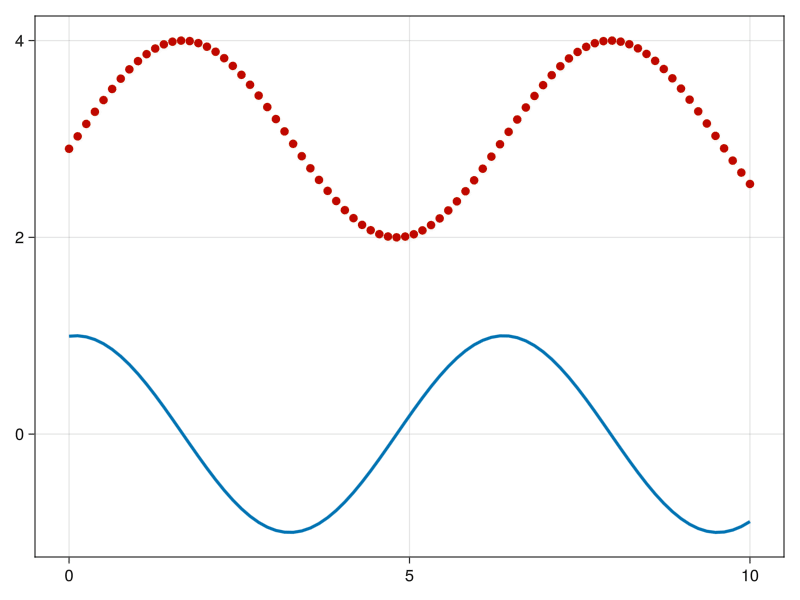

Wir können hier auch CairoMakie benutzen, da record letzendlich nur mehrere Bilder generiert und dann zu einem Video zusammenfügt.

In [85]:
# using CairoMakie
GLMakie.activate!()
 # CairoMakie.activate!()

In [60]:
# Beispiel 2:
f(z,c) = z^2 + c

# Funktion, die berechnet, wie viele Iterationen es dauert, bis |f(f(f(f(...f(z0)))))| > delta
function julia(z0, c, delta, imax)
    for i in 1:imax
        z0 = f(z0,c)
        (abs(f(z0,c)) > delta) && return i
    end
    return imax
end

julia (generic function with 1 method)

In [100]:
xvals = range(-1.5,1.5,length = 1024)
yvals = range(-1.5,1.5, length = 1024)

c = -0.4 + 0.6*im

time = Observable(0.)
juliaset = lift(time) do time 
    return log.([julia(x+im*y, c * exp(im * time), 2, 500) for x in xvals, y in yvals])
end

fig = Figure(backgroundcolor = :black)
ax = Axis(fig[1,1], backgroundcolor =:black)
hidedecorations!(ax)
hidespines!(ax)

# Auch hier erst später opacity dazu.
hm = heatmap!(ax, juliaset, colormap = :starrynight)

display(fig)

GLMakie.Screen(...)

In [ ]:
record(fig, "juliaset_animation.mp4", 0:0.01:2pi, framerate = 15) do i
    time[] = i
    println(i)
    hm.colormap = (:starrynight, 1-i/2pi)
end

# Weiterführende Links
- [Animationen in Makie](https://docs.makie.org/stable/documentation/animation/)